In [44]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

A simple data loading function.

In [45]:
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open("breast_cancer_data.csv", "r"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:2]
    y = data[:,2]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

Functionality for gradient descent - including a function for computing gradients, performing the descent loop, etc.,

In [42]:
# YOUR CODE GOES HERE - create a gradient descent function for softmax cost/logistic regression 
def softmax_grad(X, y, w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(np.asarray(w0))
    cost = softmaxval(X, y, w0)
    cost_path.append(cost)
    w = w0
    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # YOUR CODE GOES HERE - compute gradient
        grad = grad_softmax(X, y, w)
        # take gradient step
        w = w - alpha*grad

        # update path containers
        # print("the",k, "th iteration would bring value of w as:", w)
        w_path.append(w)
        # print("This time, the w_path equal to:", w_path)
        cost = softmaxval(X, y, w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (int(np.shape(w_path)[0]),3)
        
    cost_path = np.asarray(cost_path)
    cost_path.shape = (np.size(cost_path),1)

    return w_path,cost_path   
def softmax(X, y, w):
    X_trans = X.T
    grad = np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))-np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))
    for i in range(len(X_trans)):
        grad += np.log(1 + np.exp(-y[i]*np.multiply(X_trans[i], w)))
    return grad
def softmaxval(X, y, w):
    X_trans = X.T
    grad = np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))-np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))
    for i in range(len(X_trans)):
        grad += np.log(1 + np.exp(-y[i]*np.multiply(X_trans[i], w)))
    return sum(grad)



def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_softmax(X, y, w):
    X_trans = X.T    
    grad = -np.multiply(sigmoid(-y[0]*np.multiply(X_trans[0], w)),y[0]*X[:,0]) + np.multiply(sigmoid(-y[0]*np.multiply(X_trans[0], w)),y[0]*X[:,0])     
    for i in range(len(X_trans)):
        grad += -np.multiply(sigmoid(-y[i]*np.multiply(X_trans[i], w)),y[i]*X[:,i])
    return grad

In [47]:
def softmax_grad(X,y, w0):
    
    w = np.random.randn(3,1);        
    alpha = 10**-2
    max_its = 5000
    
    for k in range(max_its):

        t_temp = y*np.dot(X.T,w)
        grad =  np.dot(X,-1/(1+np.exp(t_temp))*y)
        w = w - alpha*grad
    
   
        
    return w

Up next - a plotting function to show the datapoints and learned separator.

In [24]:
# plots everything 
def plot_all(X,y,w):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    
    # plot separator
    s = np.linspace(0,1,100) 
    plt.plot(s,(2*w[-1][0]-w[-1][1]*s)/w[-1][2],color = 'k',linewidth = 2)
    
    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.show()

With everything defined, lets run all.

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


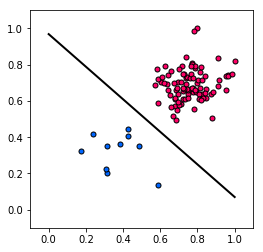

In [39]:
# load in data
X,y = load_data('imbalanced_2class.csv')
w0 = [0,0,0]
# run gradient descent
w, cost = softmax_grad(X,y,w0)

# plot points and separator
plot_all(X,y,w)

In [6]:
w


array([[0.        , 0.        , 0.        ],
       [0.4       , 0.32263375, 0.2944242 ],
       [0.70131234, 0.60198312, 0.5560802 ],
       ...,
       [2.19722458, 4.07761043, 4.53547037],
       [2.19722458, 4.07761043, 4.53547037],
       [2.19722458, 4.07761043, 4.53547037]])

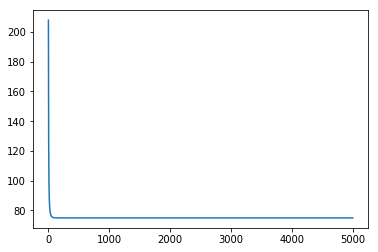

In [40]:
plt.plot(cost)
plt.show()

In [7]:
w[-1][0]

2.1972245773362182